In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
train_images = pd.read_csv('dataset/train.csv')
train_labels = train_images.pop('label')

In [3]:
train_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size = 0.33, random_state=1)

In [6]:
print('training images: ', X_train.shape)
print('training labels: ', y_train.shape)
print('testing images: ', X_test.shape)
print('testing labels: ', y_test.shape)

training images:  (28140, 784)
training labels:  (28140,)
testing images:  (13860, 784)
testing labels:  (13860,)


In [7]:
#process images
def format(training_images):
    '''
    @brief: format converts the flattened images to images of shape 28*28 pixels
    and 1 color channel(Black and White)
    @params: training_images = 2D list of size m*784
    m = number of sample images
    '''
    #converting the list to a numpy array
    data = training_images.to_numpy()
    
    #reshaping the image to its original shape
    data = data.reshape((training_images.shape[0],28,28,1)) #dimensions of every image 28*28*1 (monochrome)
    
    #converting images to float32
    data = data/255.0 #all values lie will lie between 0 and 1
    return data

In [8]:
#converting to numpy array
X_train = format(X_train)
X_test = format(X_test)
y_train = y_train.to_numpy()
y_test=  y_test.to_numpy()

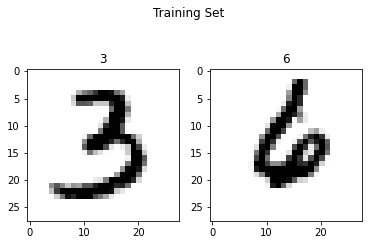

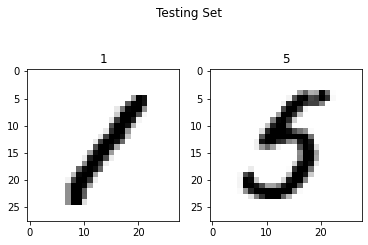

In [9]:
#visualizing Images

#from training set
fig,ax = plt.subplots(1,2)
fig.suptitle('Training Set')
for i in range(2):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i],cmap='binary')
    
    
#from testing set
fig,ax = plt.subplots(1,2)
fig.suptitle('Testing Set')
for i in range(2):
    ax[i].set_title(y_test[i])
    ax[i].imshow(X_test[i],cmap='binary')

# Data Augmentation

In [10]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

idk = datagen.flow(X_train, y_train)

# Model Training (CNN)

In [12]:
initializer = keras.initializers.GlorotNormal() #Xavier's normal initializer
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), kernel_initializer = initializer, activation = 'relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(256, (3,3), kernel_initializer = initializer, activation = 'relu'),
    keras.layers.Conv2D(128, (3,3), kernel_initializer = initializer, activation = 'relu'),
    keras.layers.Conv2D(128, (3,3), kernel_initializer = initializer, activation = 'relu'),
    keras.layers.Conv2D(128, (3,3), kernel_initializer = initializer, activation = 'relu')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       73856     
Total params: 221,888
Trainable params: 221,888
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [16]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

In [19]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32), 
    epochs=20, 
    validation_data=datagen.flow(X_test, y_test, batch_size=32))

Epoch 1/20
880/880 [==============================] - 23s 14ms/step - loss: 0.5186 - accuracy: 0.8332 - val_loss: 0.1960 - val_accuracy: 0.9388
Epoch 2/20
880/880 [==============================] - 12s 13ms/step - loss: 0.1717 - accuracy: 0.9475 - val_loss: 0.1376 - val_accuracy: 0.9595
Epoch 3/20
880/880 [==============================] - 12s 13ms/step - loss: 0.1241 - accuracy: 0.9629 - val_loss: 0.1005 - val_accuracy: 0.9694
Epoch 4/20
880/880 [==============================] - 11s 13ms/step - loss: 0.1027 - accuracy: 0.9692 - val_loss: 0.1003 - val_accuracy: 0.9706
Epoch 5/20
880/880 [==============================] - 11s 13ms/step - loss: 0.0935 - accuracy: 0.9715 - val_loss: 0.1197 - val_accuracy: 0.9647
Epoch 6/20
880/880 [==============================] - 11s 13ms/step - loss: 0.0805 - accuracy: 0.9752 - val_loss: 0.0945 - val_accuracy: 0.9730
Epoch 7/20
880/880 [==============================] - 11s 13ms/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.0917 - val_accuracy:

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

434/434 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9911
0.9910534024238586


# Model Testing

In [21]:
test_images = pd.read_csv('dataset/test.csv')
test_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#converting to numpy array
test_images = format(test_images)

In [23]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)

In [24]:
img_ID = np.arange(1,test_images.shape[0]+1)
img_ID
predictions = pd.DataFrame(np.stack((img_ID,predictions)).T,columns = ['ImageId','Label'])
predictions.to_csv('submissionCNN.csv', index=None)